# Heart disease prediction

## objective

### -predict whether a patient has heart disease.
### -Binary classification

## @ Why heart disease dataset ?
### -Fast training on tabular dataset
### -Intutive to explain features (medical measurements)
### -Parameters, Gradient descent, Optimizers, hyperparameter tuning , fine tuning can be demonstrated

## load data

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('heart disease.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## chk nunique and null value in table

In [11]:
for cols in ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']:
    print(df[cols].unique())
print(df.isnull().sum())

[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
[1 0]
[3 2 1 0]
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
[1 0]
[0 1 2]
[150 187 172 178 163 148 1

## Handeling Missing Values

In [14]:
for col in ['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']:
    med = df[col].median()
    df[col].fillna(med)  
    print(f"{col} ", df[col].isna().sum())
print(df.head(2))

trestbps  0
chol  0
fbs  0
restecg  0
thalach  0
exang  0
oldpeak  0
slope  0
ca  0
thal  0
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   

   ca  thal  target  
0   0     1       1  
1   0     2       1  


In [15]:
df = df.drop('ca', axis=1)
df = df.drop('cp', axis=1)
df = df.drop('slope', axis=1)

In [16]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,target
0,63,1,145,233,1,0,150,0,2.3,1,1
1,37,1,130,250,0,1,187,0,3.5,2,1
2,41,0,130,204,0,0,172,0,1.4,2,1
3,56,1,120,236,0,1,178,0,0.8,2,1
4,57,0,120,354,0,1,163,1,0.6,2,1


In [18]:
for cat_cols in ['fbs','exang','restecg']:
    mod= df[cat_cols].mode()[0]
    df[cat_cols]=df[cat_cols].fillna(mod).astype('object')
    print(df[cat_cols].isna().sum())
df['thal']=df['thal'].fillna('missing')
print(df['thal'].isna().sum())
cat_cols_all=['fbs','exang','restecg','thal']

0
0
0
0


C:\Users\acer\AppData\Local\Temp\ipykernel_22628\1423876508.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols]=df[cat_cols].fillna(mod).astype('object')
C:\Users\acer\AppData\Local\Temp\ipykernel_22628\1423876508.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols]=df[cat_cols].fillna(mod).astype('object')
C:\Users\acer\AppData\Local\Temp\ipykernel_22628\1423876508.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=Fals

## data visualizatiion

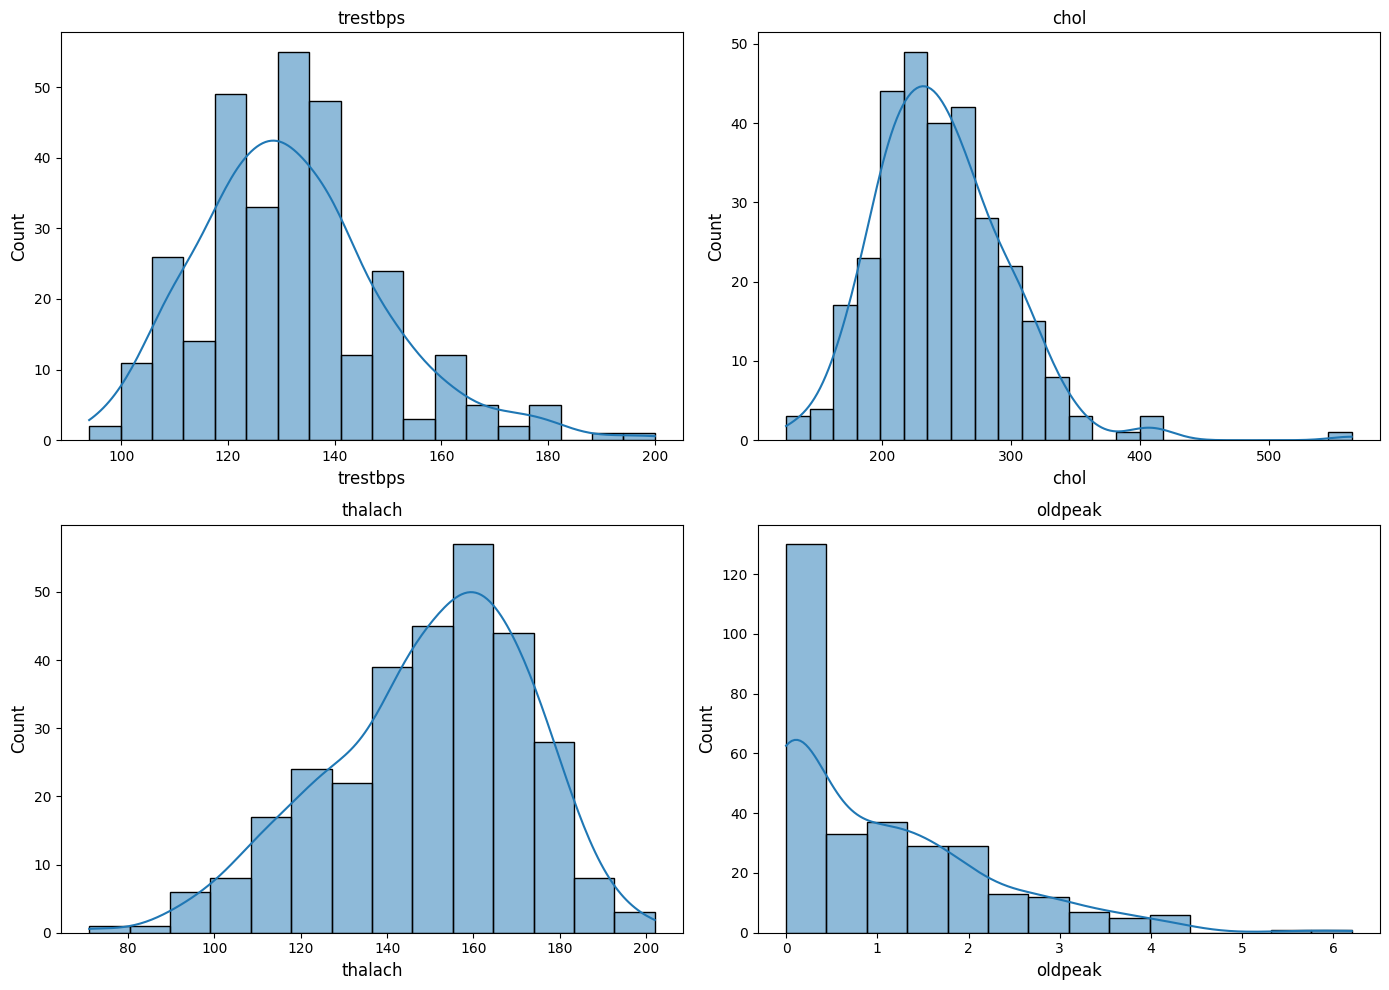

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(14,10))
axes = axes.flatten()
for i, cols in enumerate(['trestbps', 'chol', 'thalach', 'oldpeak']):
    sns.histplot(df[cols], kde=True, ax = axes[i])
    axes[i].set_title(cols,fontsize=12)
    axes[i].set_xlabel(cols, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    object 
 5   restecg   303 non-null    object 
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    object 
 8   oldpeak   303 non-null    float64
 9   thal      303 non-null    int64  
 10  target    303 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 26.2+ KB


## categorical column converted into numerical column

In [23]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

Categorical columns: ['fbs', 'restecg', 'exang']


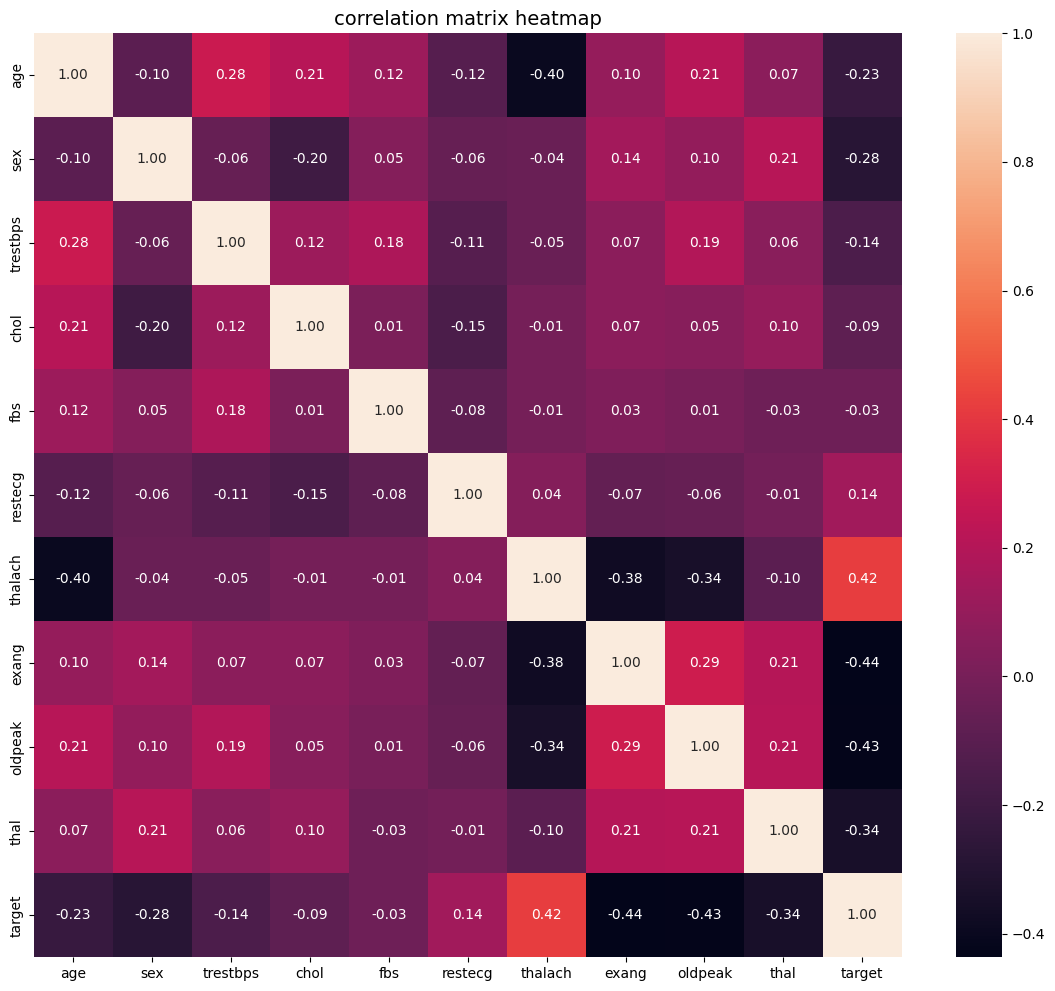

In [24]:
corr_mat = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_mat, annot=True, fmt=".2f",cbar=True)
plt.title("correlation matrix heatmap",fontsize=14)
plt.show()

## train test split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']
# df.columns
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
num_cols_total = ["age","trestbps","chol","thalach","oldpeak"]
X_train[num_cols_total] = scaler.fit_transform(X_train[num_cols_total])
X_test[num_cols_total] = scaler.transform(X_test[num_cols_total])

In [28]:
df.head(2)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,target
0,63,1,145,233,1,0,150,0,2.3,1,1
1,37,1,130,250,0,1,187,0,3.5,2,1


In [30]:
X

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal
0,63,1,145,233,1,0,150,0,2.3,1
1,37,1,130,250,0,1,187,0,3.5,2
2,41,0,130,204,0,0,172,0,1.4,2
3,56,1,120,236,0,1,178,0,0.8,2
4,57,0,120,354,0,1,163,1,0.6,2
...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,3
299,45,1,110,264,0,1,132,0,1.2,3
300,68,1,144,193,1,1,141,0,3.4,3
301,57,1,130,131,0,1,115,1,1.2,3


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## train model 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

logistic = LogisticRegression(max_iter=100, random_state=42)

logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='macro'))
print("Recall:", recall_score(y_test, y_pred,average='macro'))
print("F1 Score:", f1_score(y_test, y_pred,average='macro'))
print("ROC-AUC:", roc_auc_score(y_test, logistic.predict_proba(X_test), multi_class='ovr'))

Accuracy: 0.8360655737704918
Precision: 0.8403679653679654
Recall: 0.8389008620689655
F1 Score: 0.8360215053763441


ValueError: y should be a 1d array, got an array of shape (61, 2) instead.

## defining parameter distribution for both grid and randomized search

In [35]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'C':[0.01,0.1,1,10,100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear','saga']
}


param_dist = {
    'C': np.logspace(-2,2,20),
    'penalty': ['l1','l2'],
    'solver': ['liblinear','saga']
}

## grid search

In [36]:

grid_search = GridSearchCV(
    logistic,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

logi_grid_best = grid_search.best_estimator_
y_pred_grid = logi_grid_best.predict(X_test)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.7686496164863114


## Randomized search

In [37]:

random_search = RandomizedSearchCV(
    logistic,
    param_distributions=param_dist,
    n_iter=20,  
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

logi_random_best = random_search.best_estimator_
y_pred_random = logi_random_best.predict(X_test)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.29763514416313175)}
Best CV Score: 0.7677616155983105


## Comparison of randomized search and grid search 

In [38]:

results = {
    "Method": ["Grid Search", "Randomized Search"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_grid),
        accuracy_score(y_test, y_pred_random)
    ],
    "F1 Macro": [
        f1_score(y_test, y_pred_grid, average='macro'),
        f1_score(y_test, y_pred_random, average='macro')
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

              Method  Accuracy  F1 Macro
0        Grid Search  0.836066  0.836022
1  Randomized Search  0.819672  0.819478


## Using pytorch

In [39]:
df_pytorch = df.copy()

In [42]:
df_pytorch.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,target
0,63,1,145,233,1,0,150,0,2.3,1,1
1,37,1,130,250,0,1,187,0,3.5,2,1
2,41,0,130,204,0,0,172,0,1.4,2,1
3,56,1,120,236,0,1,178,0,0.8,2,1
4,57,0,120,354,0,1,163,1,0.6,2,1


In [44]:
# feature and target separation
X_py = df_pytorch.drop('target',axis=1).values
y_py = df_pytorch['target'].values

In [47]:
# train test split
import torch
import torch.nn as nn

X_train, X_test, y_train, y_test = train_test_split(
    X_py, y_py, test_size=0.2, random_state=42
)

# Conversion to pytorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [48]:
# Defining logistic regression
num_features = X_train.shape[1]
num_class = len(set(y_train))

model = nn.Linear(num_features,num_class)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [53]:
# Training loop
for epoch in range(1000):  # fewer epochs for simplicity
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 50, Loss: 0.4338
Epoch 100, Loss: 0.4327
Epoch 150, Loss: 0.4320
Epoch 200, Loss: 0.4315
Epoch 250, Loss: 0.4312
Epoch 300, Loss: 0.4310
Epoch 350, Loss: 0.4308
Epoch 400, Loss: 0.4307
Epoch 450, Loss: 0.4306
Epoch 500, Loss: 0.4306
Epoch 550, Loss: 0.4305
Epoch 600, Loss: 0.4304
Epoch 650, Loss: 0.4303
Epoch 700, Loss: 0.4303
Epoch 750, Loss: 0.4302
Epoch 800, Loss: 0.4301
Epoch 850, Loss: 0.4301
Epoch 900, Loss: 0.4300
Epoch 950, Loss: 0.4299
Epoch 1000, Loss: 0.4299


In [67]:
outputs = model(X_test_tensor)

# predicted class indices
_, pred = torch.max(outputs, 1)

# safe conversion (works everywhere)
y_true = y_test            # already numpy
y_pred = pred.detach().cpu().tolist()

print("Test Accuracy:", accuracy_score(y_true, y_pred))
print("Test F1 Macro:", f1_score(y_true, y_pred, average='macro'))

Test Accuracy: 0.8360655737704918
Test F1 Macro: 0.8360215053763441
